In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Dataset/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Separate features and target variable
X = data.drop("Class", axis=1)
y = data["Class"]

In [ ]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

In [ ]:
# Drop rows with missing values in the target variable y
missing_indices = y[y.isnull()].index
X_imputed = np.delete(X_imputed, missing_indices, axis=0)
y = y.dropna()

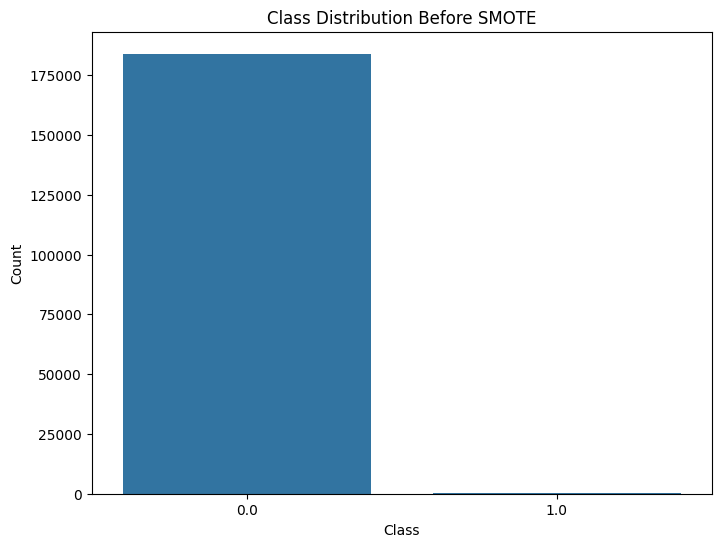

In [ ]:
# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=data)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_imputed, y)

In [ ]:
# Concatenate original and synthetic data
synthetic_data = pd.DataFrame(X_smote, columns=X.columns)
synthetic_data["Class"] = y_smote

In [ ]:
# Print basic information about the synthetic dataset
print("\nBasic information about the synthetic dataset:")
print(synthetic_data.info())


Basic information about the synthetic dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367878 entries, 0 to 367877
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    367878 non-null  float64
 1   V1      367878 non-null  float64
 2   V2      367878 non-null  float64
 3   V3      367878 non-null  float64
 4   V4      367878 non-null  float64
 5   V5      367878 non-null  float64
 6   V6      367878 non-null  float64
 7   V7      367878 non-null  float64
 8   V8      367878 non-null  float64
 9   V9      367878 non-null  float64
 10  V10     367878 non-null  float64
 11  V11     367878 non-null  float64
 12  V12     367878 non-null  float64
 13  V13     367878 non-null  float64
 14  V14     367878 non-null  float64
 15  V15     367878 non-null  float64
 16  V16     367878 non-null  float64
 17  V17     367878 non-null  float64
 18  V18     367878 non-null  float64
 19  V19     367878 non-null  float64
 20  

In [ ]:
# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_smote.value_counts())


Class distribution after SMOTE:
Class
0.0    183939
1.0    183939
Name: count, dtype: int64


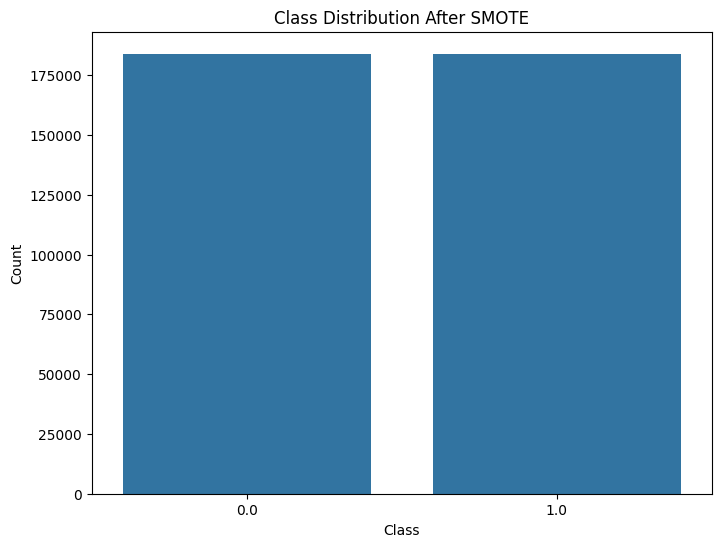

In [ ]:
# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=synthetic_data)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# Save the synthetic data to a new CSV file if needed
synthetic_data.to_csv("synthetic_creditcard.csv", index=False)